# Regresión logística
---

* Regresión logística
* Selección de características
* Reducción usando PCA


In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

En este ejemplo, empezaremos por ver como crear un clasificador binario sobre el siguiente problema:

Los datos consisten en calificaciones de dos exámenes para 100 alumnos. El valor objetivo adquiere valores binarios [0,1]. 1 significa que el alumno fue admitido en la universidad, mientras que 0 significa que no fue admitido. 

El objetivo es construir un clasificador que pueda predecir si una aplicación será admitida en la universidad o no.

El conjunto de datos se encuentra en la carpeta *data* y se llama *marks.txt*.

### 1: Carga los datos en un dataframe. Cambiamos los nombres de las columnas

In [61]:
path = "data/marks.txt"
df = pd.read_csv(path, header=None)
df.columns = ["Examen 1", "Examen 2", "Admitido"]

df

,Examen 1,Examen 2,Admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


### 2: Mostramos la información de forma gráfica

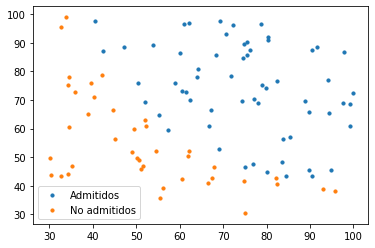

In [64]:
# X = Primer y segundo examen
X = df.iloc[:, :-1]

# y = solución
y = df.iloc[:, -1]

# Obtenemos los admitidos
admitted = df.loc[y == 1]

# Obtenemos los no admitidos
not_admitted = df.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitidos')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='No admitidos')
plt.legend()
plt.show()

### 3: Generamos los descriptivos básicos

Algunas preguntas que estaria bien contestar
1. Es un problema desbalanceado?
1. Existen valores nulos?
1. Existen outliers?

In [16]:
df.describe()

,Examen 1,Examen 2,Admitido
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### 4: Dividimos los datos en dos partes: df_train y df_test con el 80% y el 20% de los datos repartidos de forma aleatoria.

La pregunta a contestar es **Por qué hacemos esto?**

In [20]:
### Mezcla el dataframe y utiliza una random_seed = 42
df = df.sample(frac=1, random_state=42)
### Cuanto es el 80% de los datos?
train_size = int(0.8*df.shape[0])
### Crea una df_train y el df_test a partir del resultado anterior y el metodo .loc[]
df_train = df.loc[:train_size]
df_test = df.loc[train_size:]

### 5: Carga la libreria de sklearn que permite entrenar una regresión logística.

Instanciamos el modelo bajo el nombre `clf_lr`

In [25]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression( solver="lbfgs") # Esta sentencia nos crea un clasificador logístico

### 6: Entrenamos el modelo y lo evaluamos

In [22]:
X_train = df_train.drop('Admitido', axis=1)
y_train = df_train['Admitido']

In [65]:
# Esta sentencia entrena el clasificador con nuestro conjunto de entrenamiento
clf_lr.fit(X_train, y_train)
# Como resultado vemos los diferentes parámetreos del método
# Vamos a comentar: C, random_state

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
X_test = df_test.drop('Admitido', axis=1)
y_test = df_test['Admitido']
clf_lr.score(X_test, y_test)

0.9032258064516129

**Vamos a ver de manera gráfica como de bueno es nuestro modelo sobre el conjunto de test**

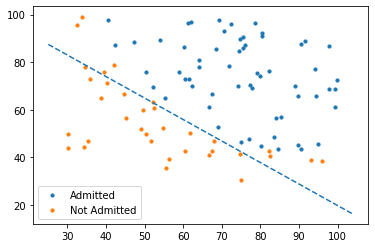

In [60]:


# X = feature values, all the columns except the last column
X = df_test.iloc[:, :-1]

# y = target values, last column of the data frame
y = df_test.iloc[:, -1]

# filter out the applicants that got admitted
admitted = df_test.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = df_test.loc[y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

x_values = [np.min(X["Examen 1"] - 5), np.max(X["Examen 2"] + 5)]
y_values =  - (clf_lr.intercept_ + np.dot(clf_lr.coef_[0][0], x_values)) / clf_lr.coef_[0][1] 
plt.plot(x_values, y_values, "--")

plt.legend()
plt.show()

### Ejercicio : Repite el mismo proceso cambiando el parametro C y compara los resultados